# Classical Forecasting Methods

In this notebook, we will set the stage for the development of forecasting methods throughout the tutorial series. 

This particular notebook aims to familiarize ourselves with the exchange rate dataset. We will:

1. Import the exchange rate data for analysis.
2. Convert the daily exchange rates to weekly exchange rates. This choice is based on the observation that classical methods are very slow to optimize on large datasets.
3. Split the dataset into training and testing sets that will be used throughout the tutorial.

**Note:** We will encapsulate these loading and splitting functions into a function in `utils.py` to avoid repetition in every notebook.

## Setup

In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random 

import utils_tfb
import utils

from tqdm.notebook import tqdm
from IPython.display import display

PLOTTING_COLORS = utils.PLOTTING_COLORS

FORECASTING_HORIZON = [4, 8, 12]

%load_ext autoreload
%autoreload 2

## Load Dataset

In [5]:
def load_tutotrial_data(dataset):
    """Loads dataset for tutorial."""
    TS_DATA_FOLDER = pathlib.Path("./forecasting").resolve()
    if dataset == 'exchange_rate':
        dataset = TS_DATA_FOLDER / "Exchange.csv"
        data = utils_tfb.read_data(str(dataset))
        data.index.freq = 'D'  # since we know that the frequency is daily
        data = data.resample("W").mean() # Resmaple to obtain weekly time series
        return data
    else:
        raise ValueError(f"Unrecognized dataset: {dataset}")
    

In [4]:
data = load_tutotrial_data(dataset='exchange_rate')
data.index

DatetimeIndex(['1990-01-07', '1990-01-14', '1990-01-21', '1990-01-28',
               '1990-02-04', '1990-02-11', '1990-02-18', '1990-02-25',
               '1990-03-04', '1990-03-11',
               ...
               '2010-08-08', '2010-08-15', '2010-08-22', '2010-08-29',
               '2010-09-05', '2010-09-12', '2010-09-19', '2010-09-26',
               '2010-10-03', '2010-10-10'],
              dtype='datetime64[ns]', name='date', length=1084, freq='W-SUN')

**Note:** The frequency of index is "W-Sun" meaning that the measurements repeat weekly, every sunday. 

## Train-Test Split

Here we split such that we have a validation set for measuring our metrics. Usually, the models are trained on a surrogate objective intended to represent the metric that we care about (e.g., MASE). However, this objective might not perfectly correlate with our metric. Hence, we need a validation set where we can measure our metric and choose the best setting of the model. We will care about the metric computed over the max horizon in `FORECASTING_HORIZON`. 

Once we have done this hyperparameter selection, we can compute the overall metric on the test data. 
Once again, depending on the forecasting horizon, the metric may change. 
Here, we will look at the forecasting horizons specified in `FORECASTING_HORIZON` as well as the full length of the test data. 

In [7]:
train_size = int(len(data) * 0.9)
test_size = int(len(data) * 0.1)
train_val_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

max_horizon = max(FORECASTING_HORIZON)
train_data, val_data = train_val_data.iloc[:-max_horizon], train_val_data.iloc[-max_horizon:]

print(f"Number of steps in training data: {len(train_data)}\nNumber of steps in test data: {len(test_data)}")

Number of steps in training data: 963
Number of steps in test data: 109


## Exploratory Analysis of Exchange Rate Dataset

To recap, the **exchange rate dataset** contains daily exchange rates from 1990 to 2016 for 8 countries: Australia, Britain, Canada, Switzerland, China, Japan, New Zealand, and Singapore. It includes a total of 8 univariate time series, each with 7,588 time steps.

Let's proceed with the usual exploration to gain familiarity with the dataset.

**Note:** We will only examine the **training data** to ensure that our choice of modeling techniques is not influenced by the validation or test data, thus preventing bias in the metrics.

### Raw Data

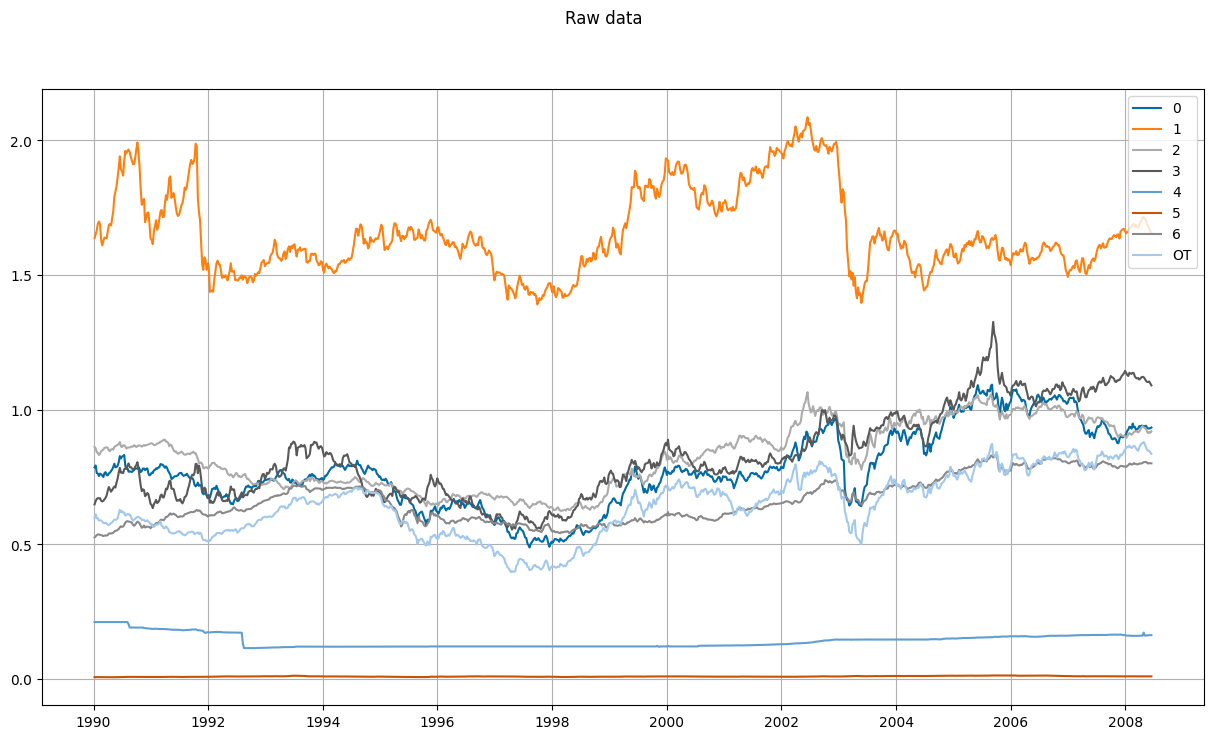

In [8]:
fig, ax = utils.plot_raw_data(train_data, figsize=(15, 8))

### Correlation Plots

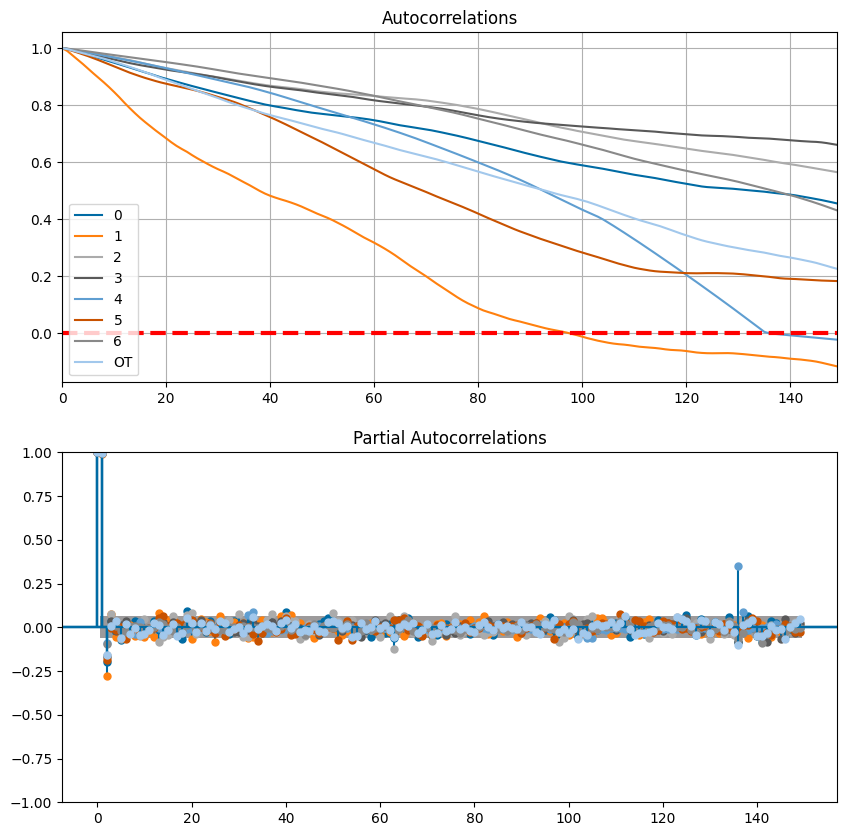

In [9]:
fig, ax = utils.plot_acf_pacf(train_data, cols=None, figsize=(10, 10))

### Seasonality Decomposition

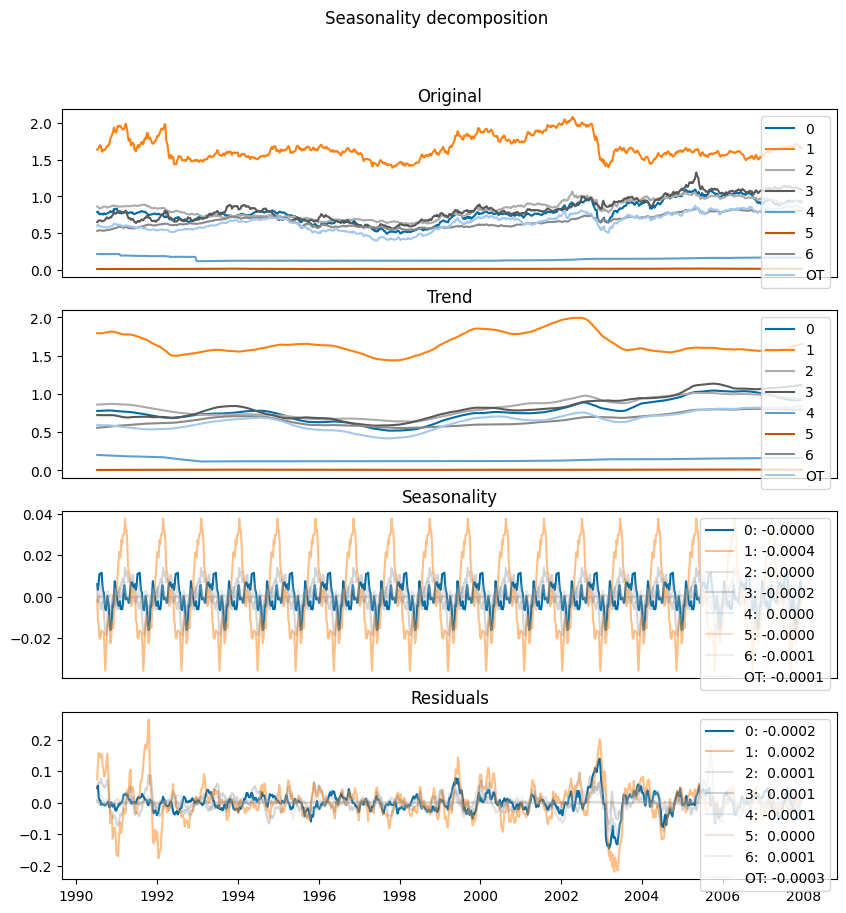

In [10]:
fig, ax = utils.plot_seasonality_decompose(train_data, figsize=(10, 10))

### Check Stationarity 

In [11]:
utils.check_stationarity(train_data)

Col: 0	P-value: 0.5316	Stationary: False
Col: 1	P-value: 0.0578	Stationary: False
Col: 2	P-value: 0.7141	Stationary: False
Col: 3	P-value: 0.7491	Stationary: False
Col: 4	P-value: 0.0701	Stationary: False
Col: 5	P-value: 0.2237	Stationary: False
Col: 6	P-value: 0.7666	Stationary: False
Col: OT	P-value: 0.6251	Stationary: False


**Observations:**

- Zero-Centered seasonality indicates that the long-term effect of seasonality is minimal.
- Residual component shows peaks, suggesting occasional deviations from the means
- Trend exhibits periodicity, likely due to underlying factors affecting the time series at regular intervals.
- None of the time series are stationary, implying that non-linear models may be required to model them well.
- Partial Autocorrelation Function (PACF) shows a sharp decline, indicating a strong correlation between the previous and next values.
- Autocorrelation Function (ACF) shows strong correlations across larger lags, indicating strong dependence between data points at various lags.


## Next Steps

Proceed to `03.2_classical_models.ipynb` to explore classical forecasting methods on this dataset.